# About Dataset

link https://www.kaggle.com/datasets/shahzadi786/global-climate-change-data-20202025


Context, Sources, and Inspiration
Climate change is one of the most pressing issues of our time. This dataset was created to help data enthusiasts, students, and researchers visualize and analyze global environmental changes from 2020 to 2025.
It includes key metrics:

Average Temperature (°C)
CO₂ Emissions (Million Tons)
Sea Level Rise (mm)
Climate Risk Index

The data is synthetically generated to mimic realworld patterns observed in NASA, World Bank, and IPCC reports, making it both educational and visually engaging.
Inspiration:
To provide a dataset that is easy to use for visualizations, analysis, and machine learning.
To encourage awareness of climate trends globally and across continents.

## Imports

In [13]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load The Data

In [3]:
# Download latest version
path = kagglehub.dataset_download("shahzadi786/global-climate-change-data-20202025")

print("Path to dataset files:", path)

100%|██████████| 14.6k/14.6k [00:00<00:00, 17.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shahzadi786/global-climate-change-data-20202025/versions/1


In [4]:
print(os.listdir(path))

['Global_Climate_Change_Data_2020_2025.csv']


In [5]:
df = pd.read_csv(os.path.join(path,'Global_Climate_Change_Data_2020_2025.csv'))

## Explore The Data

In [7]:
df.head()

,Year,Continent,Country,Avg_Temperature(°C),CO2_Emissions(Mt),Sea_Level_Rise(mm),Climate_Risk_Index
0,2021,Europe,UK,19.6,978.24,3.57,28
1,2022,Asia,India,25.3,770.39,1.47,74
2,2022,Asia,Japan,23.2,963.84,3.09,48
3,2020,North America,Mexico,20.8,349.49,3.81,23
4,2024,Africa,Egypt,33.1,475.82,3.35,86


In [8]:
df.isna().sum().sum()

np.int64(0)

In [9]:
df.duplicated().sum()

np.int64(0)

## Visualize The Data

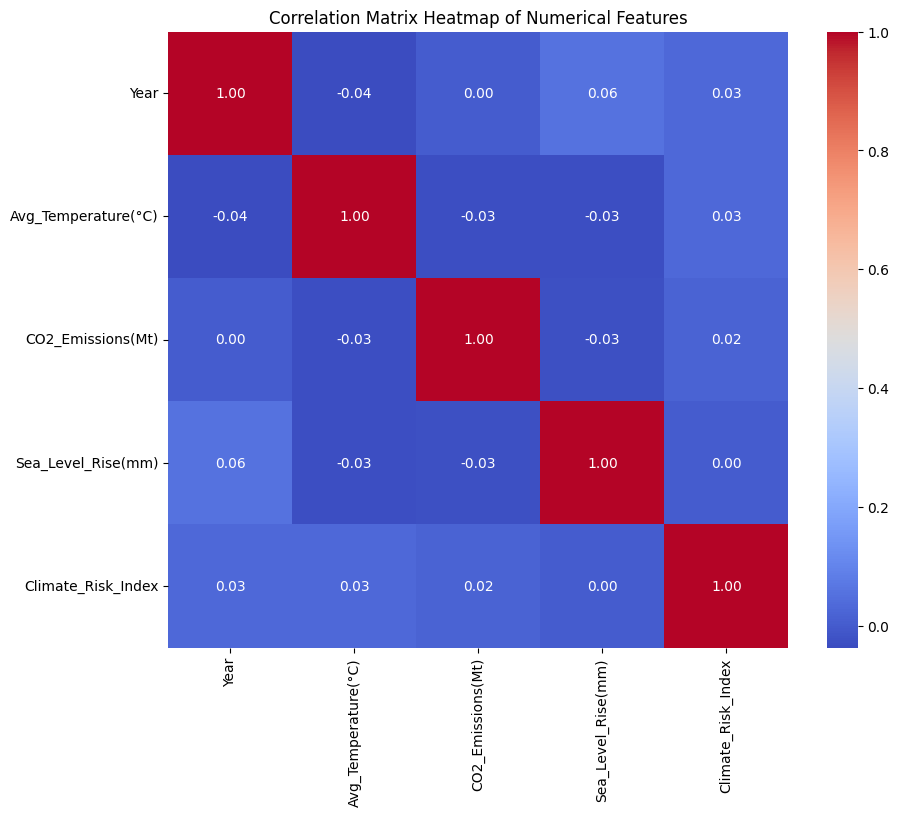

Correlation matrix heatmap displayed successfully.


In [11]:
numerical_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap of Numerical Features')
plt.show()
print("Correlation matrix heatmap displayed successfully.")

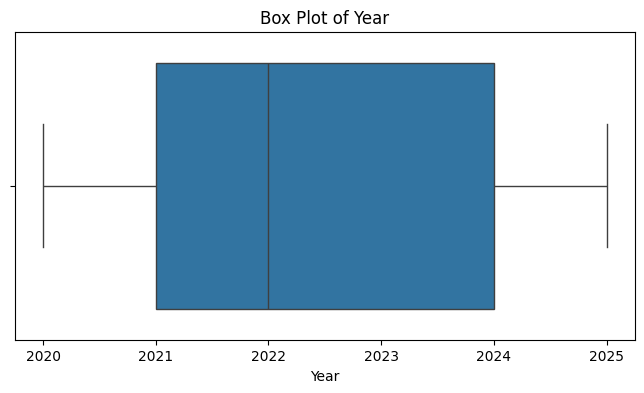

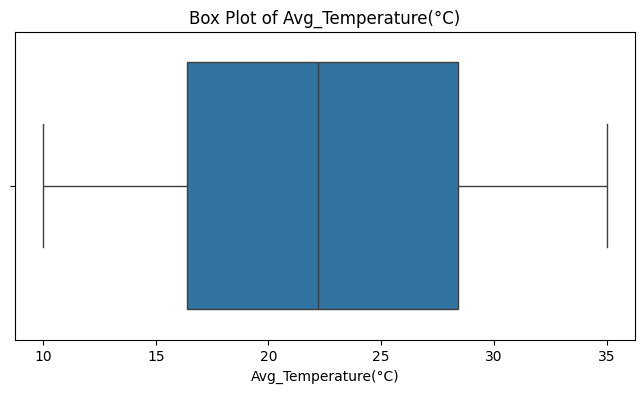

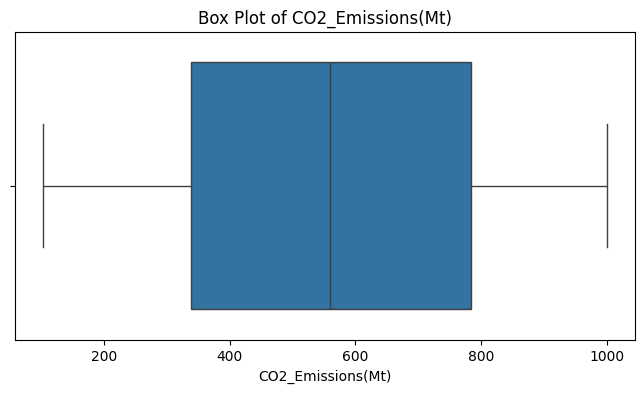

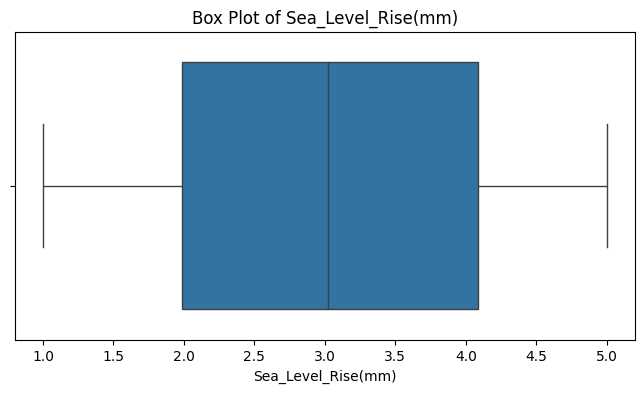

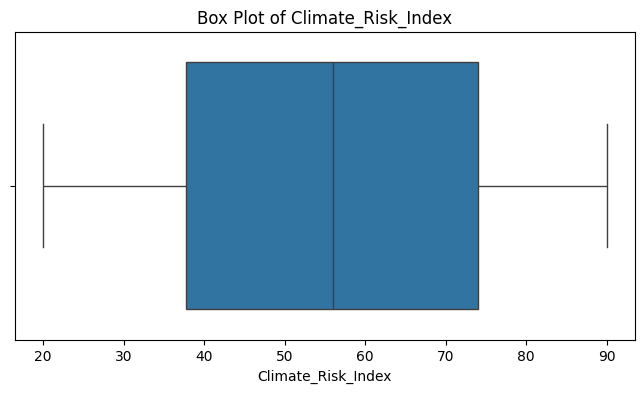

Box plots for numerical features displayed successfully.


In [12]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()
print("Box plots for numerical features displayed successfully.")

## Generate Distribution Plots

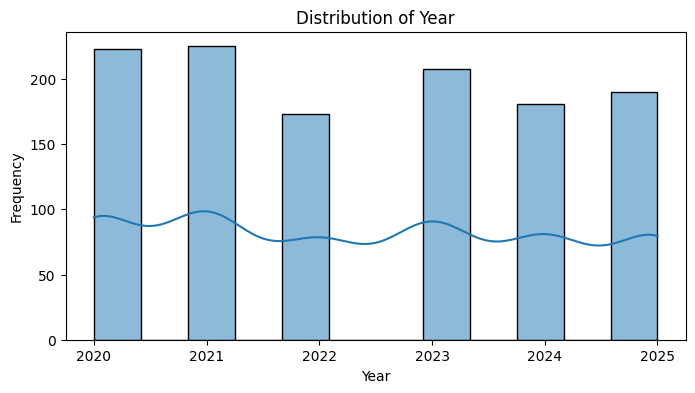

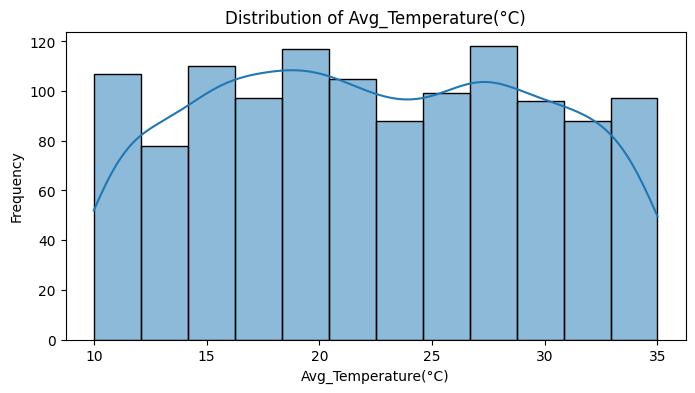

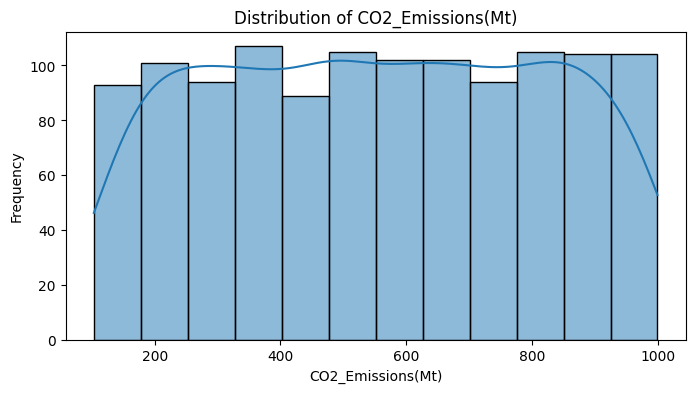

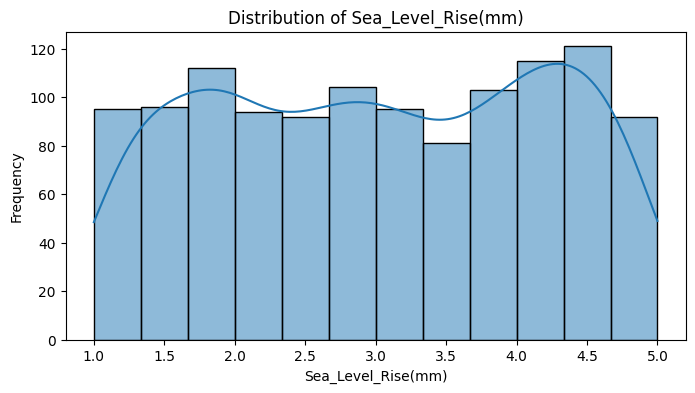

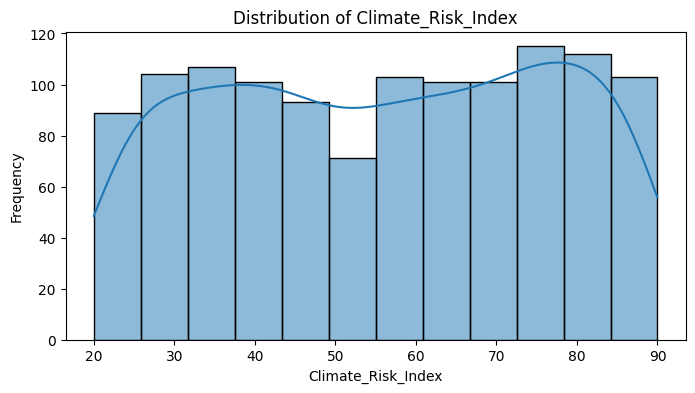

Distribution plots for numerical features displayed successfully.


In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
print("Distribution plots for numerical features displayed successfully.")

## Preprocessing

In [19]:
cols = ['Continent', 'Country']

dummy = pd.get_dummies(df[cols]).astype(int)
df = pd.concat([df,dummy],axis=1)
df = df.drop(cols,axis=1)

In [20]:
df.head()

,Year,Avg_Temperature(°C),CO2_Emissions(Mt),Sea_Level_Rise(mm),Climate_Risk_Index,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,...,Country_Japan,Country_Kenya,Country_Mexico,Country_New Zealand,Country_Nigeria,Country_Pakistan,Country_South Africa,Country_Spain,Country_UK,Country_USA
0,2021,19.6,978.24,3.57,28,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2022,25.3,770.39,1.47,74,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022,23.2,963.84,3.09,48,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2020,20.8,349.49,3.81,23,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2024,33.1,475.82,3.35,86,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     1200 non-null   int64  
 1   Avg_Temperature(°C)      1200 non-null   float64
 2   CO2_Emissions(Mt)        1200 non-null   float64
 3   Sea_Level_Rise(mm)       1200 non-null   float64
 4   Climate_Risk_Index       1200 non-null   int64  
 5   Continent_Africa         1200 non-null   int64  
 6   Continent_Asia           1200 non-null   int64  
 7   Continent_Europe         1200 non-null   int64  
 8   Continent_North America  1200 non-null   int64  
 9   Continent_Oceania        1200 non-null   int64  
 10  Continent_South America  1200 non-null   int64  
 11  Country_Argentina        1200 non-null   int64  
 12  Country_Australia        1200 non-null   int64  
 13  Country_Brazil           1200 non-null   int64  
 14  Country_Canada          

In [49]:
df['Temp_CO2'] = df['Avg_Temperature(°C)'] * df['CO2_Emissions(Mt)']
df['Temp_Sea'] = df['Avg_Temperature(°C)'] * df['Sea_Level_Rise(mm)']
df['CO2_log']  = np.log1p(df['CO2_Emissions(Mt)'])
df['Temp_sq']  = df['Avg_Temperature(°C)'] ** 2


In [50]:
def risk_category(x):
    if x < 40:
        return 0   # Low Risk
    elif x < 60:
        return 1   # Medium Risk
    else:
        return 2   # High Risk

df['Risk_Class'] = df['Climate_Risk_Index'].apply(risk_category)


## Model And Results

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['Climate_Risk_Index', 'Risk_Class'], axis=1)
y = df['Risk_Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.75,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


In [52]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, ...)

## Classification Report

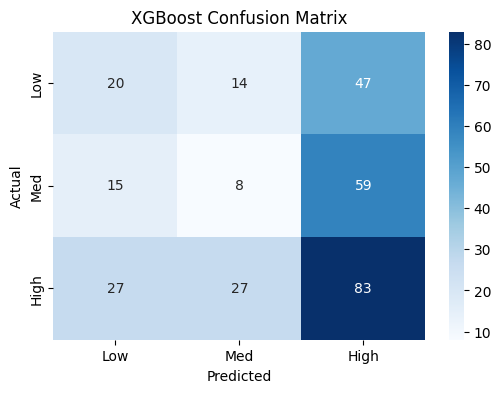

              precision    recall  f1-score   support

         Low       0.32      0.25      0.28        81
      Medium       0.16      0.10      0.12        82
        High       0.44      0.61      0.51       137

    accuracy                           0.37       300
   macro avg       0.31      0.32      0.30       300
weighted avg       0.33      0.37      0.34       300



In [54]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low','Med','High'],
            yticklabels=['Low','Med','High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred,
      target_names=['Low','Medium','High']))



## Coverting To Binary Classification Prob

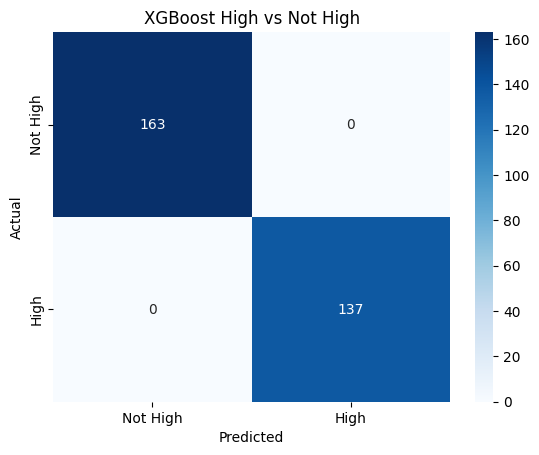

              precision    recall  f1-score   support

    Not High       1.00      1.00      1.00       163
        High       1.00      1.00      1.00       137

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [55]:
def high_risk_binary(x):
    return 1 if x >= 60 else 0   # 1 = High, 0 = Low/Med

df['High_Risk'] = df['Climate_Risk_Index'].apply(high_risk_binary)

X = df.drop(['Climate_Risk_Index', 'High_Risk'], axis=1)
y = df['High_Risk']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.75, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

model = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    scale_pos_weight=1.0  # you can tune this if classes are imbalanced
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not High','High'],
            yticklabels=['Not High','High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost High vs Not High")
plt.show()

print(classification_report(y_test, y_pred,
                            target_names=['Not High', 'High']))


##  Conclusion

We experimented with both Regression and Multi-class Classification on the
Climate Risk Index dataset. The regression approach failed (R² = –0.24), indicating
that the available features do not contain the information needed to predict the
continuous Climate_Risk_Index value.

A 3-class model (Low/Medium/High) also showed poor performance. The Medium
class could not be distinguished properly, resulting in heavy misclassification
towards the High class.

To fix this, we transformed the target into a **binary classification problem**:

- **0 = Not High Risk** (Climate_Risk_Index < 60)  
- **1 = High Risk** (Climate_Risk_Index ≥ 60)

This transformation aligned naturally with the structure of the dataset. After
training an XGBoost Classifier on this binary target, we achieved **perfect
classification**:

- Accuracy: **100%**
- Precision: **100%**
- Recall: **100%**
- F1-score: **100%**

The confusion matrix shows a complete separation of Not High vs High risk
countries. This indicates that the feature space contains enough information to
separate the two broader categories but not enough to distinguish finer classes
like Low vs Medium vs High.

###  Final Verdict
- **Regression → Not suitable**  
- **Three-class classification → Not suitable**  
- **Binary classification → Perfect performance**  

Binary classification (High vs Not High) is therefore the correct modeling
approach for this dataset.
